## Plot PMEL Flux COARE3.0

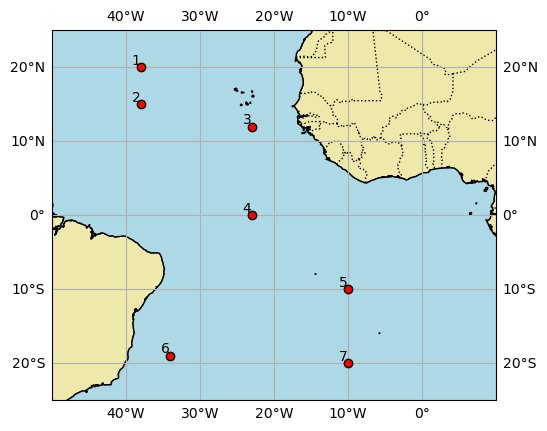

In [1]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Função para ler as coordenadas lat/lon de um arquivo NetCDF e fechá-lo após uso
def ler_coordenadas(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]  # Certifique-se de que 'lat' corresponde ao nome correto da variável de latitude
    lon = ds.variables['lon'][:]  # Certifique-se de que 'lon' corresponde ao nome correto da variável de longitude
    ds.close()
    return lat, lon, arquivo

# Caminho para a pasta contendo os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/Dados_fluxos_PMEL/qsen*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler e ordenar coordenadas dos arquivos
coordenadas_arquivos = [ler_coordenadas(arquivo) for arquivo in arquivos_netCDF]
arquivos_ordenados = sorted(coordenadas_arquivos, key=lambda x: x[0], reverse=True)

# Criar a figura e o subplot com projeção PlateCarree (mapa)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicionar recursos de terra e água com cores explícitas
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='palegoldenrod')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Adicionando linhas de costa, fronteiras e grades
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Definir os limites do mapa
ax.set_extent([-50, 10, -25, 25], crs=ccrs.PlateCarree())

# Loop para plotar marcadores e números
for i, (lat, lon, arquivo) in enumerate(arquivos_ordenados):
    ax.plot(lon, lat, 'o', color='red', markersize=6,markeredgecolor='black', transform=ccrs.Geodetic())
    ax.text(lon, lat, str(i+1), transform=ccrs.Geodetic(), ha='right', va='bottom')

plt.show()

### Dados Fluxo de calor sensível PMEL COARE3.0 

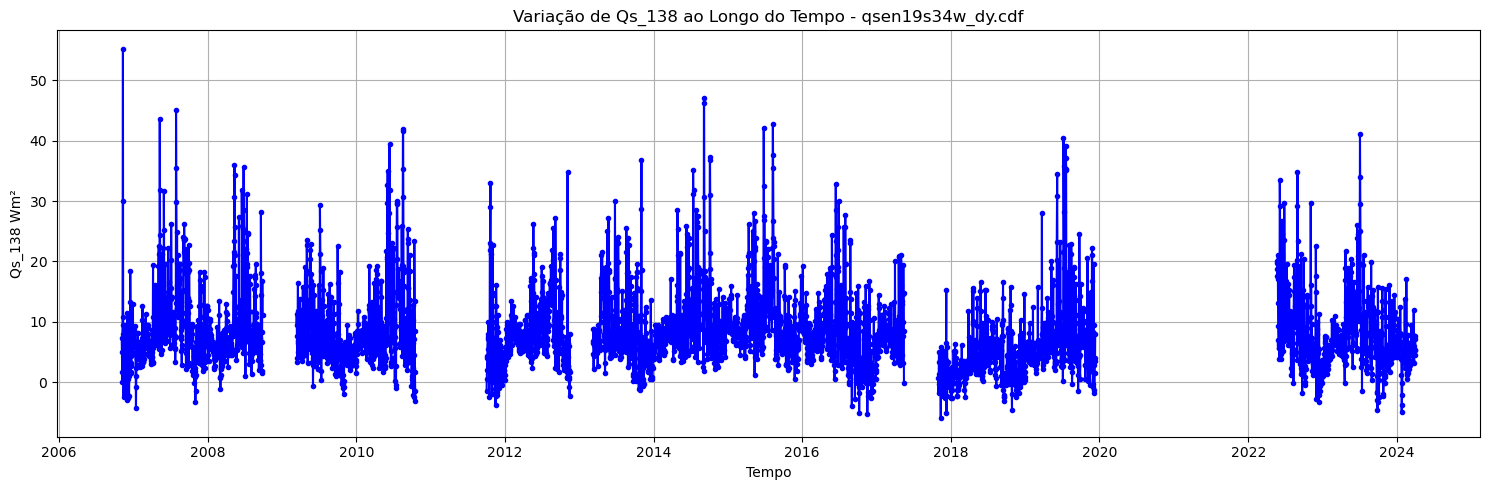

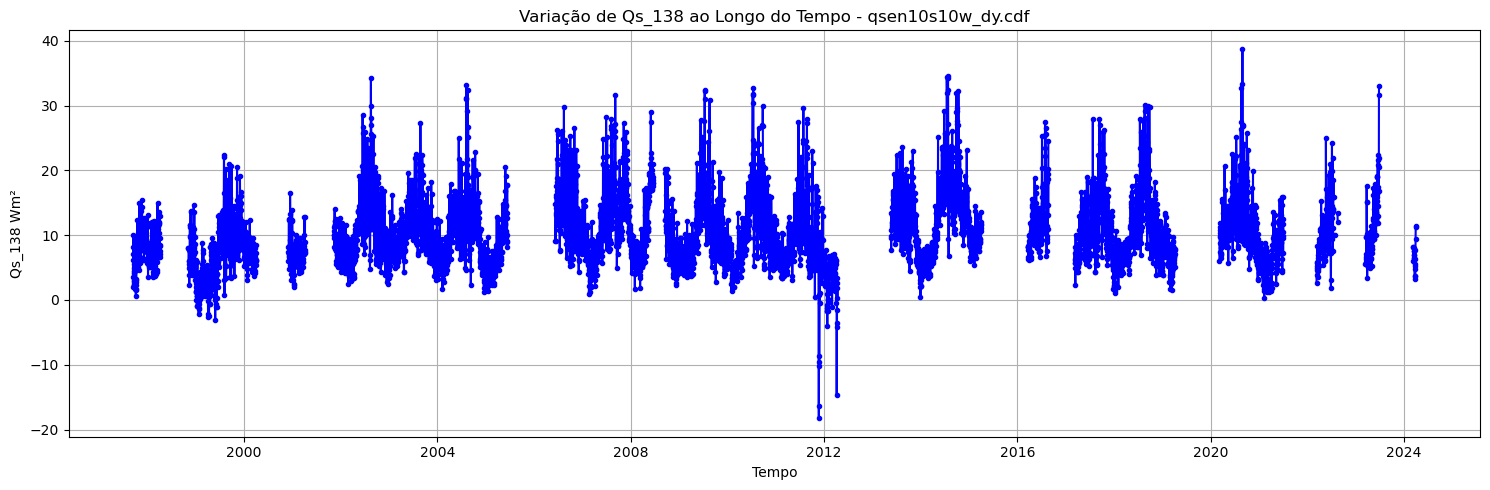

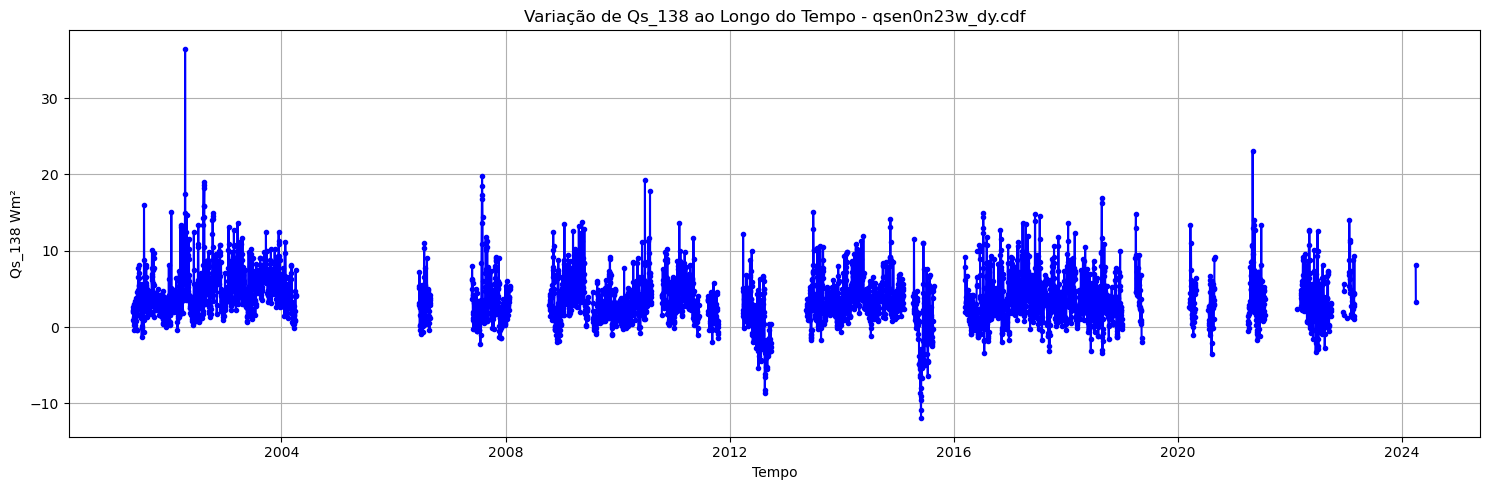

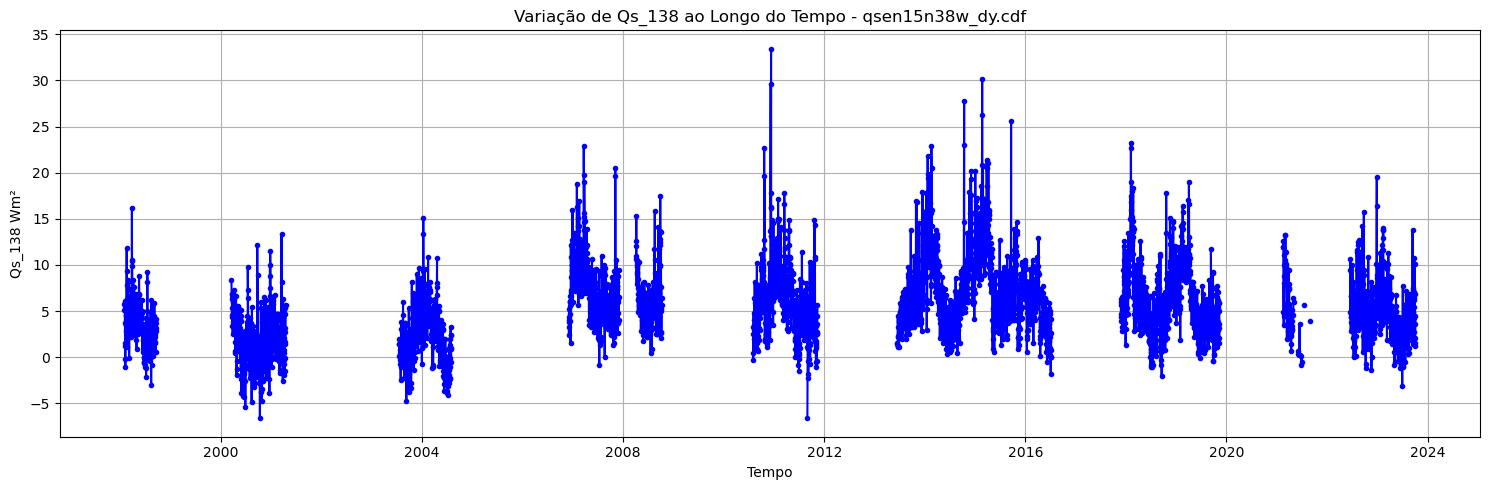

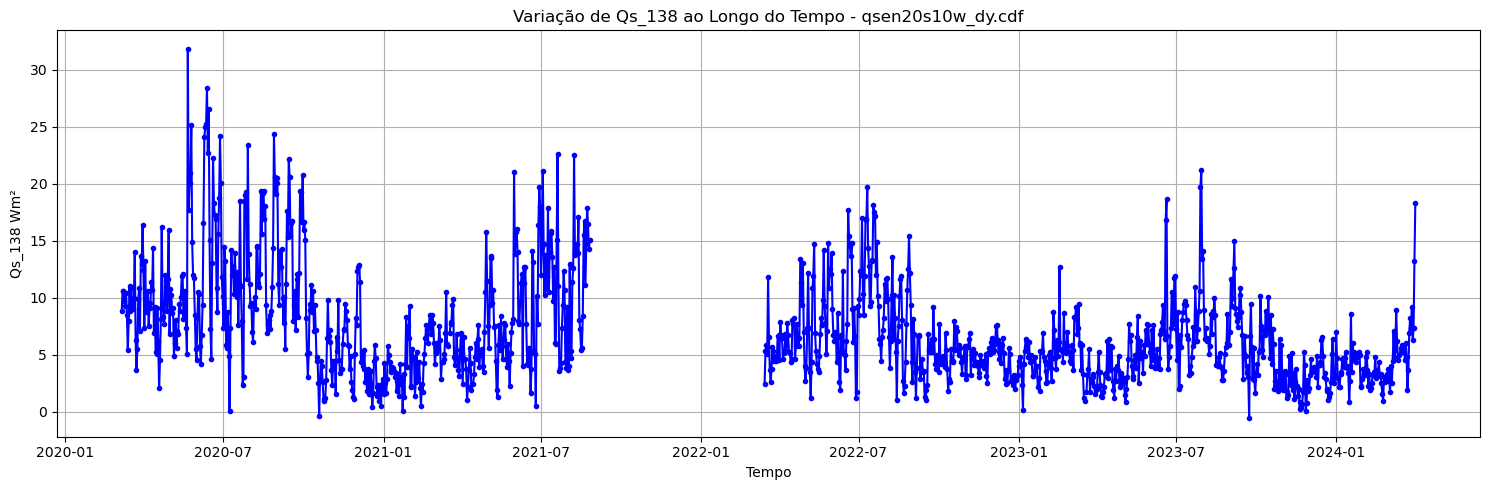

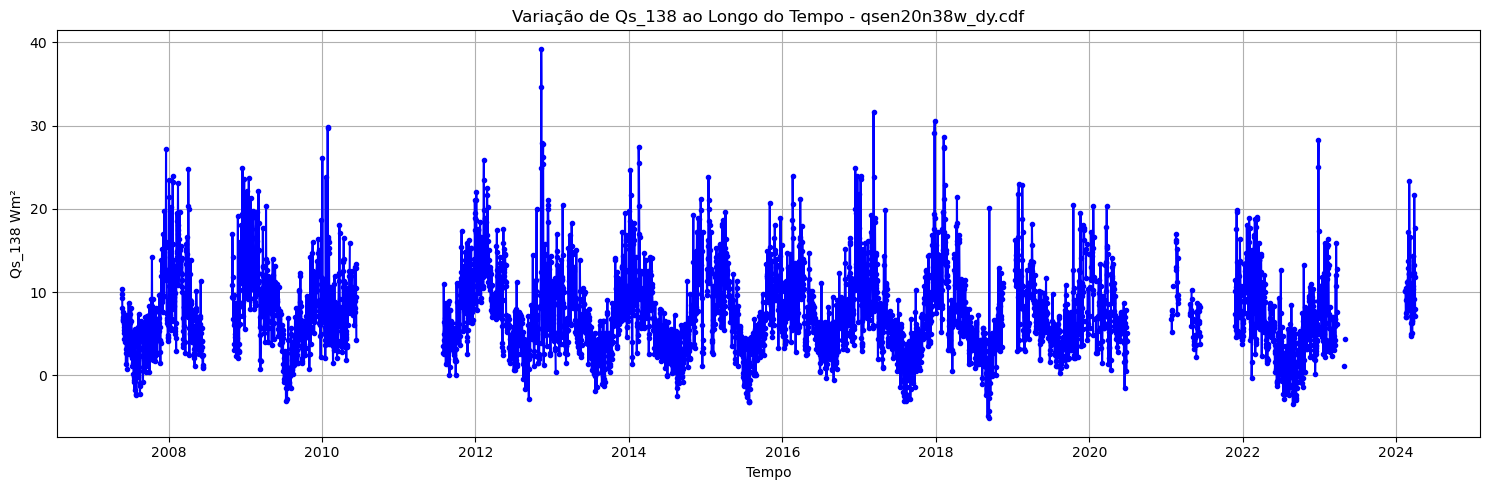

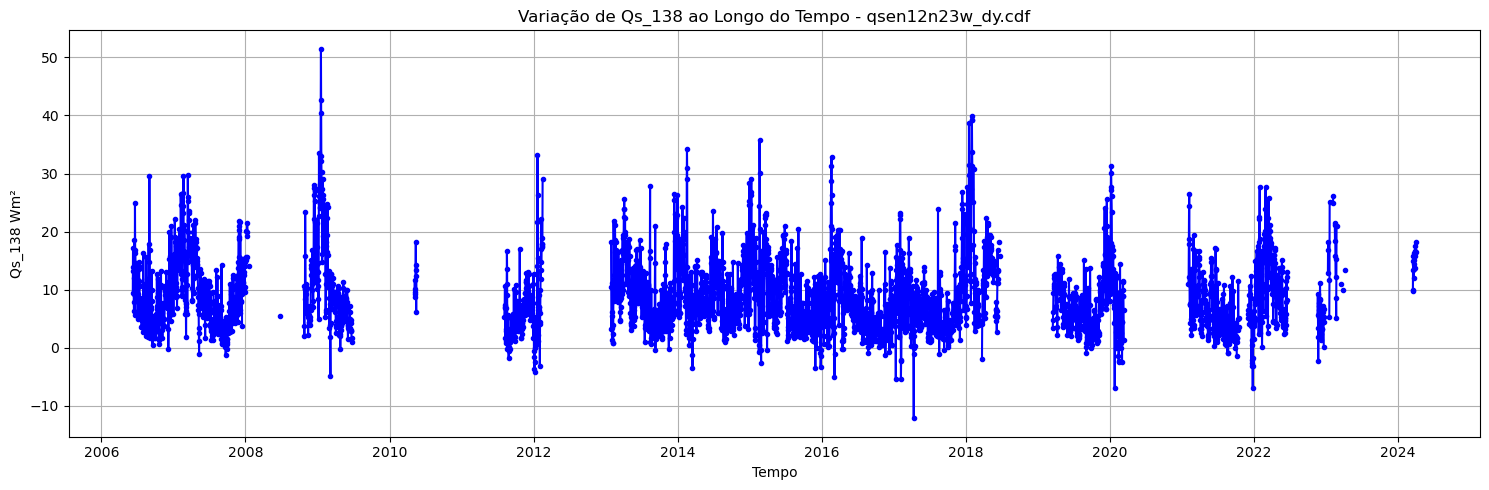

In [2]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Função para ler tempo e variável de interesse de um arquivo NetCDF
def ler_dados(arquivo, var_nome):
    ds = nc.Dataset(arquivo)
    tempo = ds.variables['time'][:]
    variavel = ds.variables[var_nome][:]
    # Extrair a data de origem dos units da variável tempo
    units = ds.variables['time'].units
    ds.close()
    # Remover dimensões singulares
    variavel = np.squeeze(variavel)
    # Extrair a data de origem dos units
    origin_date = pd.to_datetime(units.split('since ')[1])
    return tempo, variavel, origin_date

# Caminho para os arquivos
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/Dados_fluxos_PMEL/qsen*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Nome da variável de interesse
var_nome = 'QS_138'  # Substitua pelo nome real da sua variável

# Processar e plotar dados de cada arquivo individualmente
for arquivo in arquivos_netCDF:
    tempo, variavel, origin_date = ler_dados(arquivo, var_nome)
    
    # Converter tempo para objetos datetime
    tempo = pd.to_datetime(tempo, unit='D', origin=origin_date)

    # Criar uma nova figura para cada arquivo
    plt.figure(figsize=(15,5))
    plt.plot(tempo, variavel, marker='.', linestyle='-', color='blue')
    plt.title(f'Variação de {var_nome.capitalize()} ao Longo do Tempo - {arquivo.split("/")[-1]}')
    plt.xlabel('Tempo')
    plt.ylabel(f'{var_nome.capitalize()} Wm²')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


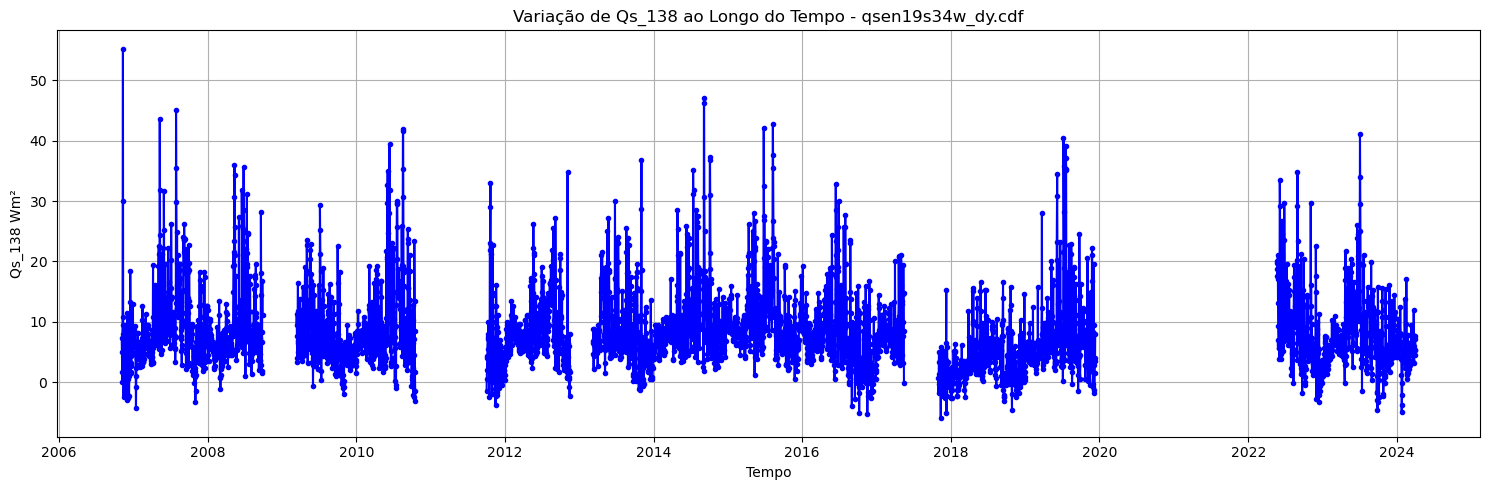

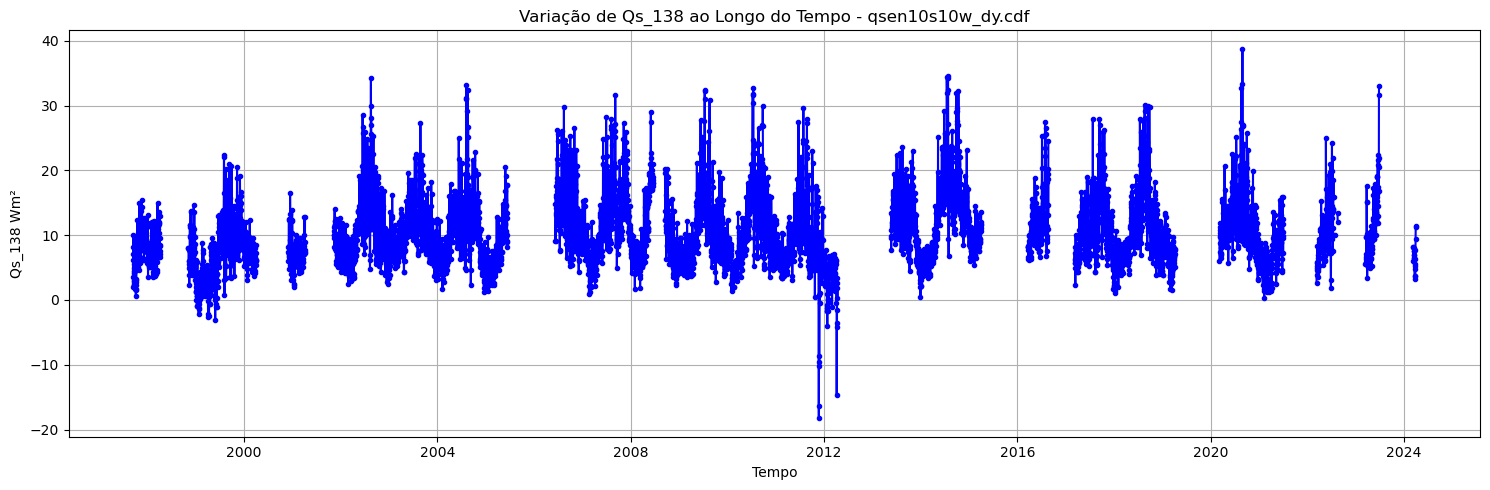

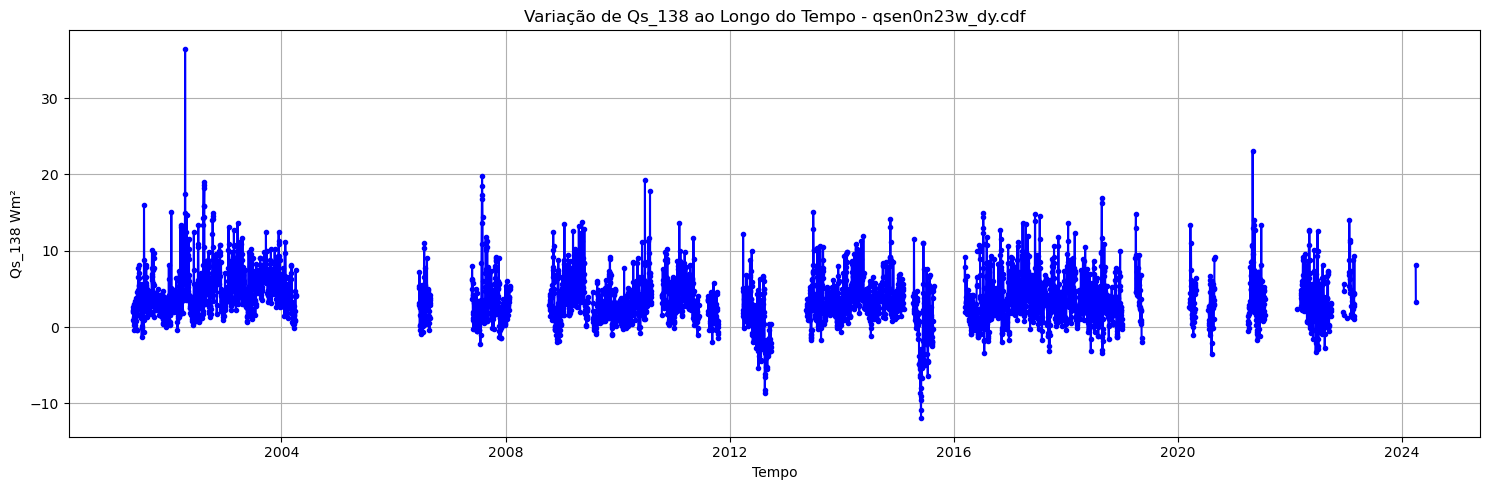

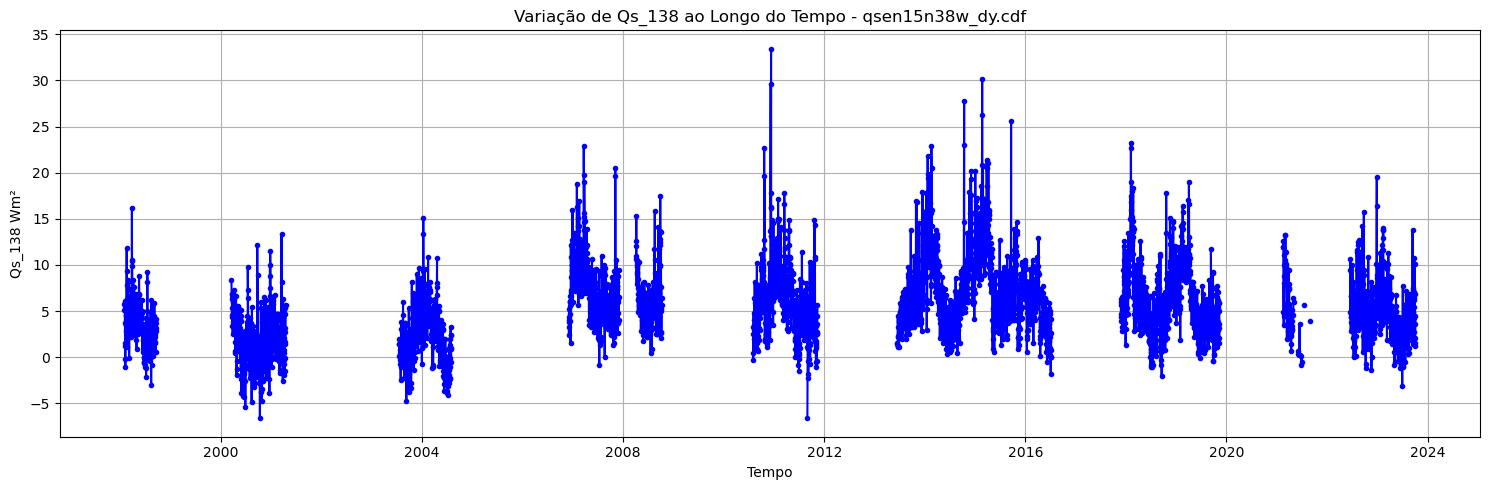

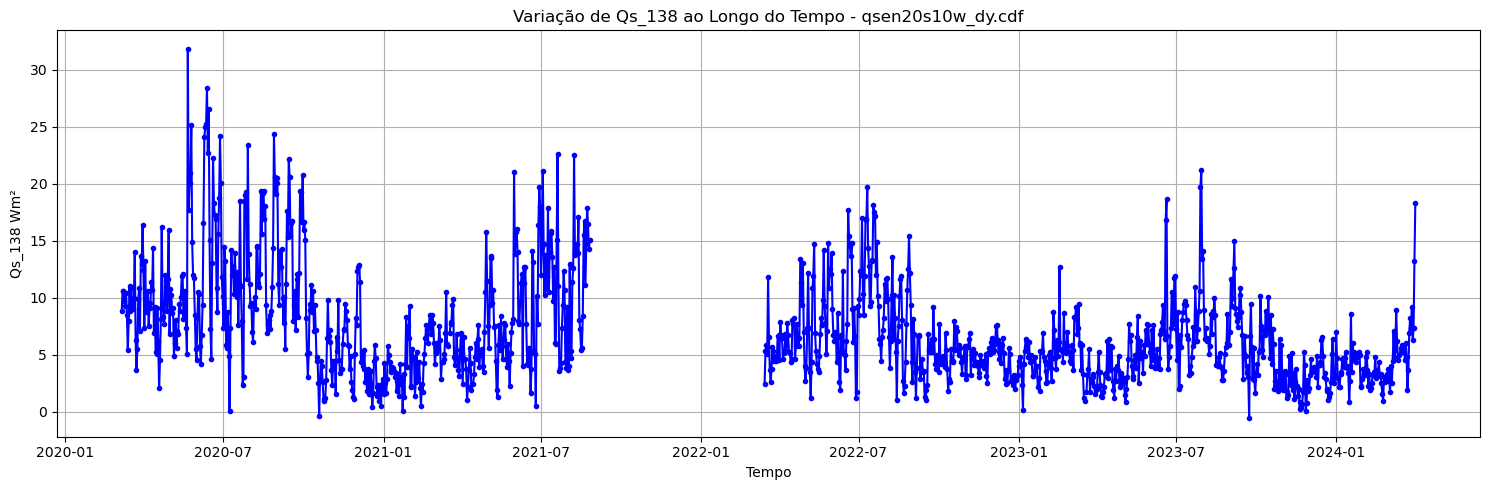

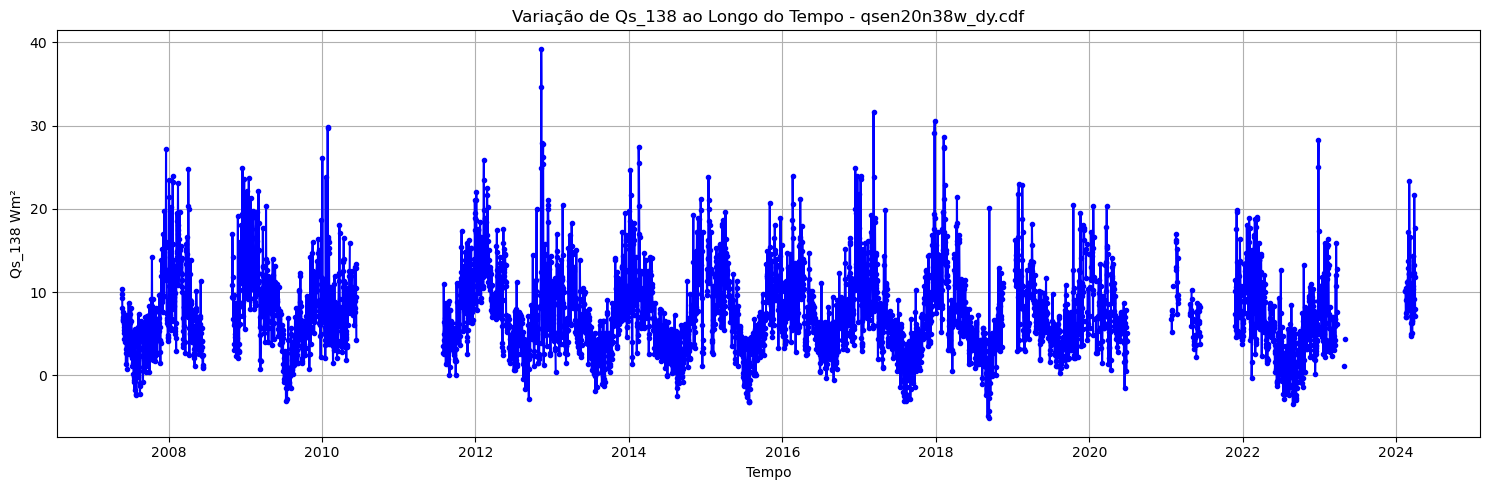

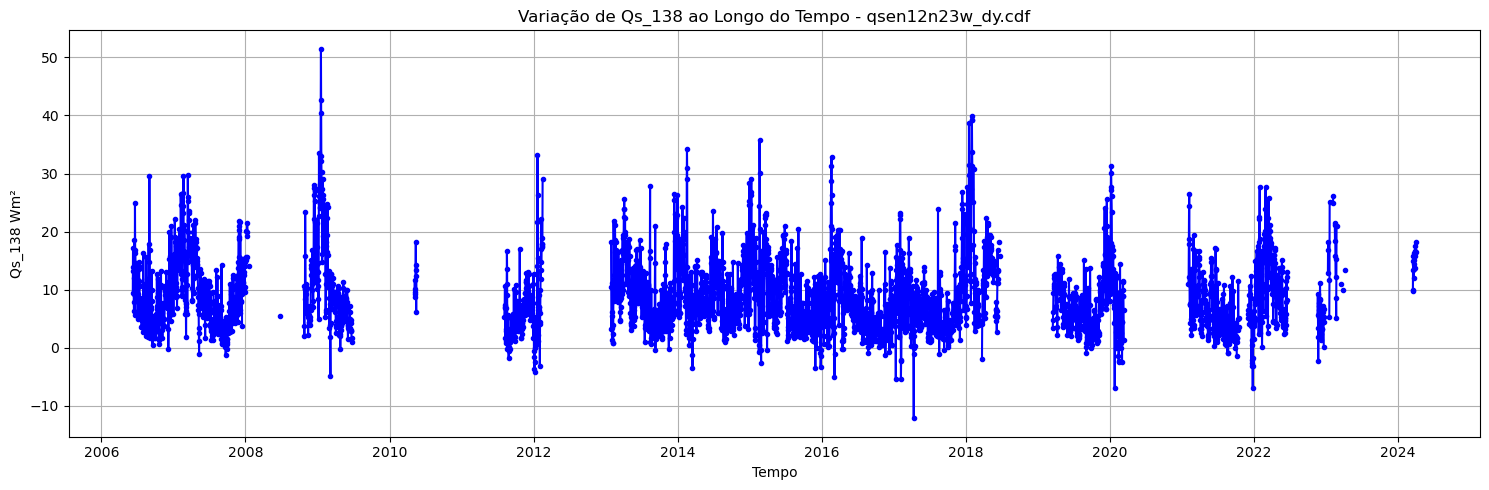

Arquivo: qsen19s34w_dy.cdf - Média: 8.21 Wm², Desvio Padrão: 6.26 Wm²
Arquivo: qsen10s10w_dy.cdf - Média: 10.32 Wm², Desvio Padrão: 5.30 Wm²
Arquivo: qsen0n23w_dy.cdf - Média: 3.75 Wm², Desvio Padrão: 3.12 Wm²
Arquivo: qsen15n38w_dy.cdf - Média: 5.64 Wm², Desvio Padrão: 4.12 Wm²
Arquivo: qsen20s10w_dy.cdf - Média: 6.97 Wm², Desvio Padrão: 4.63 Wm²
Arquivo: qsen20n38w_dy.cdf - Média: 7.44 Wm², Desvio Padrão: 4.91 Wm²
Arquivo: qsen12n23w_dy.cdf - Média: 8.72 Wm², Desvio Padrão: 6.07 Wm²
Média das Médias: 7.29 Wm²
Média dos Desvios Padrão: 4.92 Wm²


In [4]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Função para ler tempo e variável de interesse de um arquivo NetCDF
def ler_dados(arquivo, var_nome):
    ds = nc.Dataset(arquivo)
    tempo = ds.variables['time'][:]
    variavel = ds.variables[var_nome][:]
    units = ds.variables['time'].units
    ds.close()
    variavel = np.squeeze(variavel)
    origin_date = pd.to_datetime(units.split('since ')[1])
    return tempo, variavel, origin_date

# Caminho para os arquivos
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/Dados_fluxos_PMEL/qsen*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Nome da variável de interesse
var_nome = 'QS_138'  # Substitua pelo nome real da sua variável

# Processar dados de cada arquivo e calcular estatísticas
estatisticas = []
for arquivo in arquivos_netCDF:
    tempo, variavel, origin_date = ler_dados(arquivo, var_nome)
    tempo = pd.to_datetime(tempo, unit='D', origin=origin_date)
    
    media = np.mean(variavel)
    desvio_padrao = np.std(variavel)
    
    estatisticas.append((arquivo.split("/")[-1], media, desvio_padrao))
    
    plt.figure(figsize=(15, 5))
    plt.plot(tempo, variavel, marker='.', linestyle='-', color='blue')
    plt.title(f'Variação de {var_nome.capitalize()} ao Longo do Tempo - {arquivo.split("/")[-1]}')
    plt.xlabel('Tempo')
    plt.ylabel(f'{var_nome.capitalize()} Wm²')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exibir as estatísticas calculadas
for estat in estatisticas:
    print(f'Arquivo: {estat[0]} - Média: {estat[1]:.2f} Wm², Desvio Padrão: {estat[2]:.2f} Wm²')

# Calcular a média das médias e a média dos desvios padrões
medias = [estat[1] for estat in estatisticas]
desvios_padrao = [estat[2] for estat in estatisticas]

media_das_medias = np.mean(medias)
media_dos_desvios_padrao = np.mean(desvios_padrao)

print(f'Média das Médias: {media_das_medias:.2f} Wm²')
print(f'Média dos Desvios Padrão: {media_dos_desvios_padrao:.2f} Wm²')


### Dados de Fluxo de calor latente PMEL COARE3.0

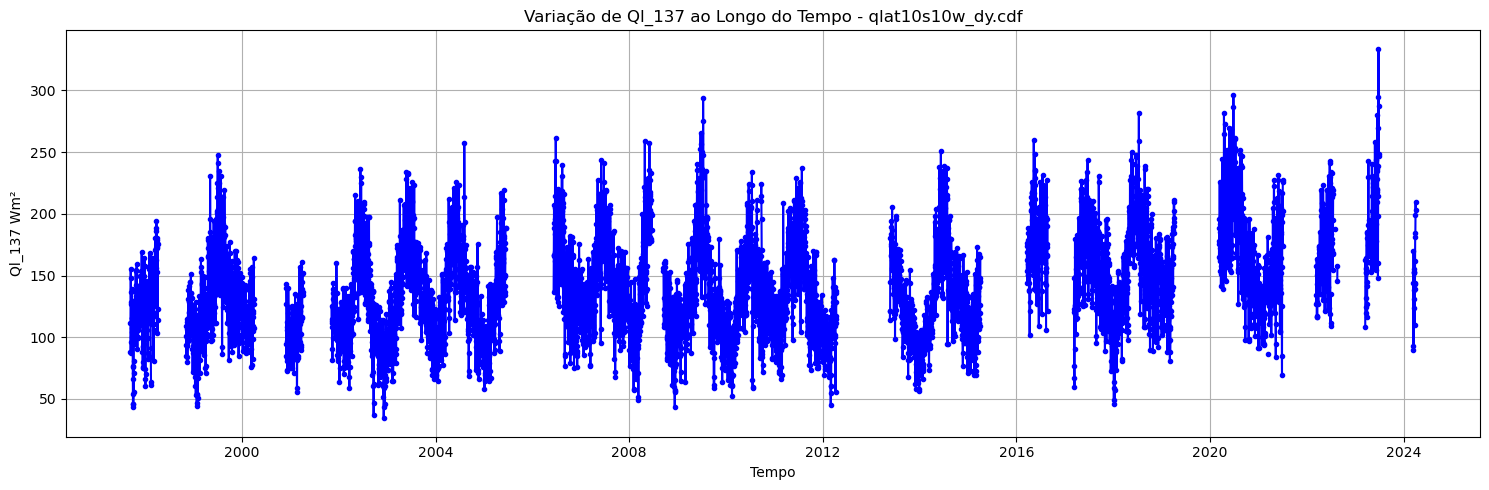

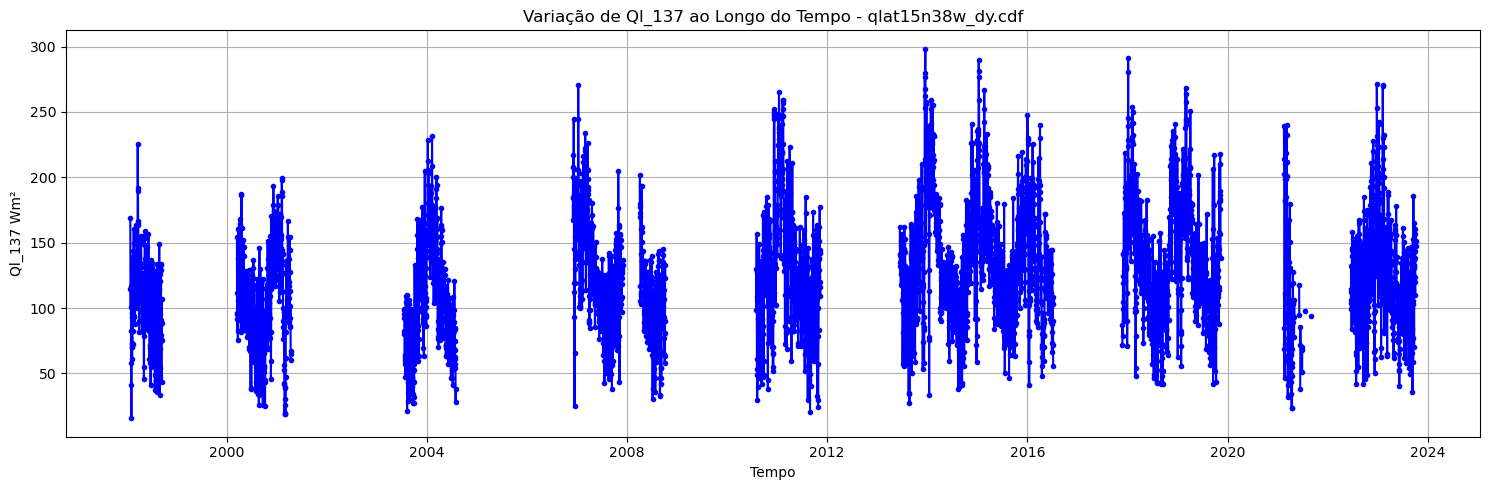

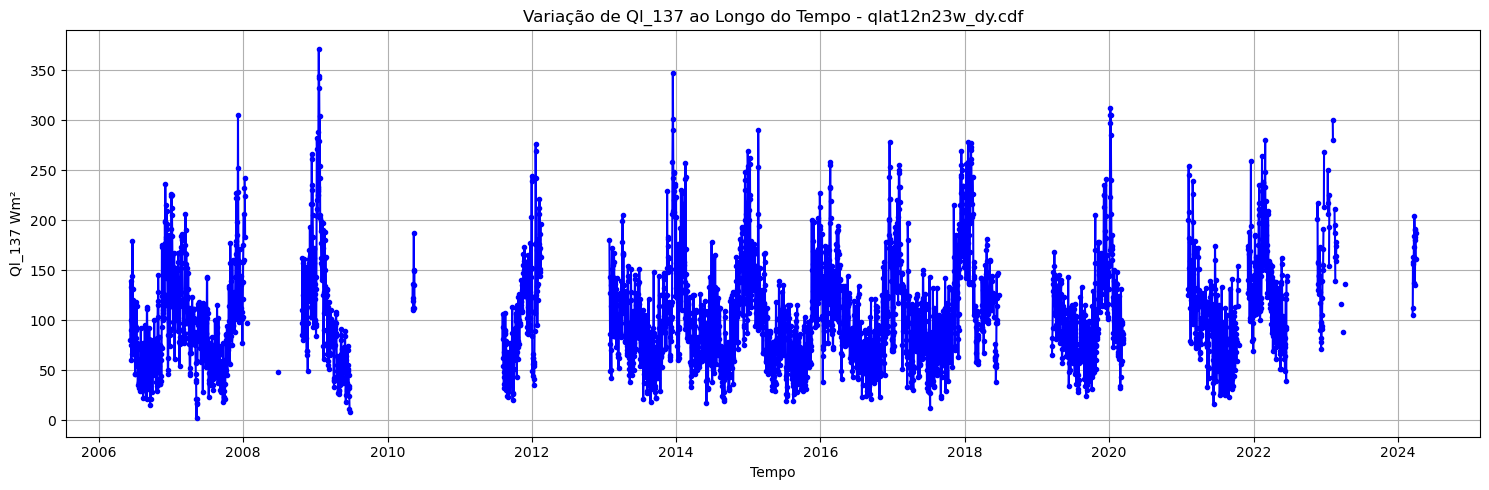

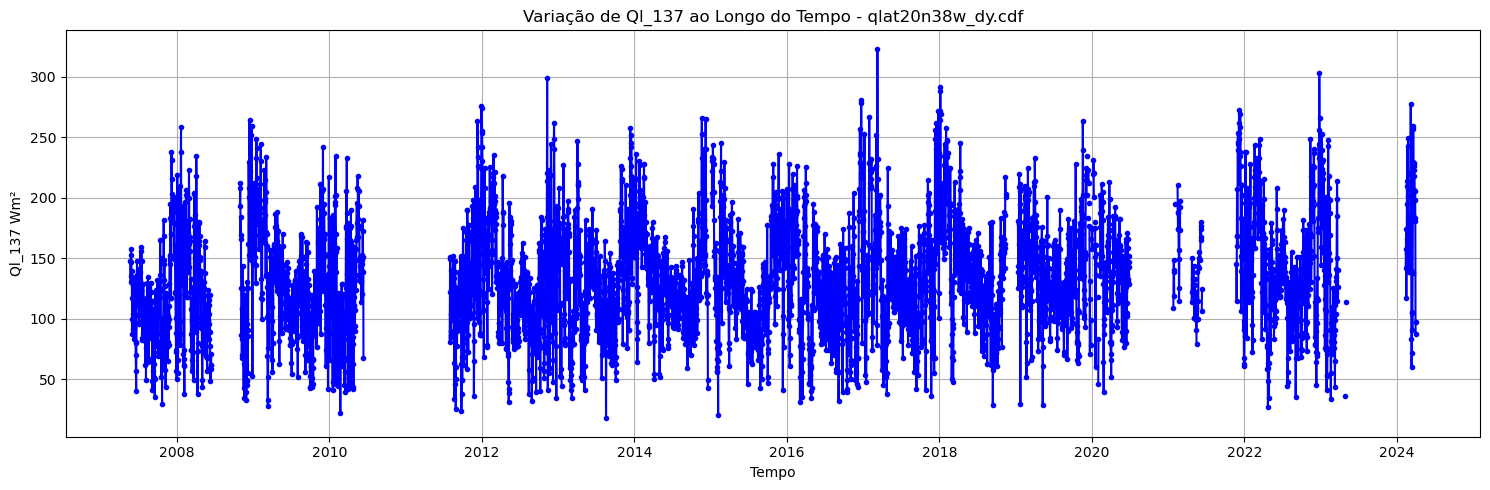

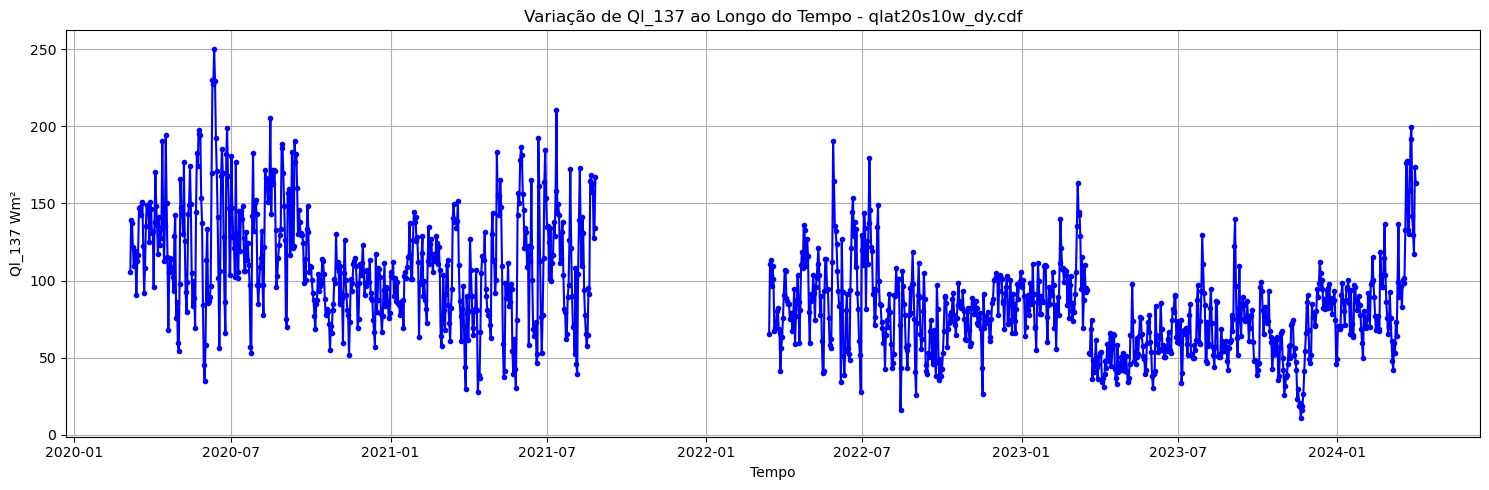

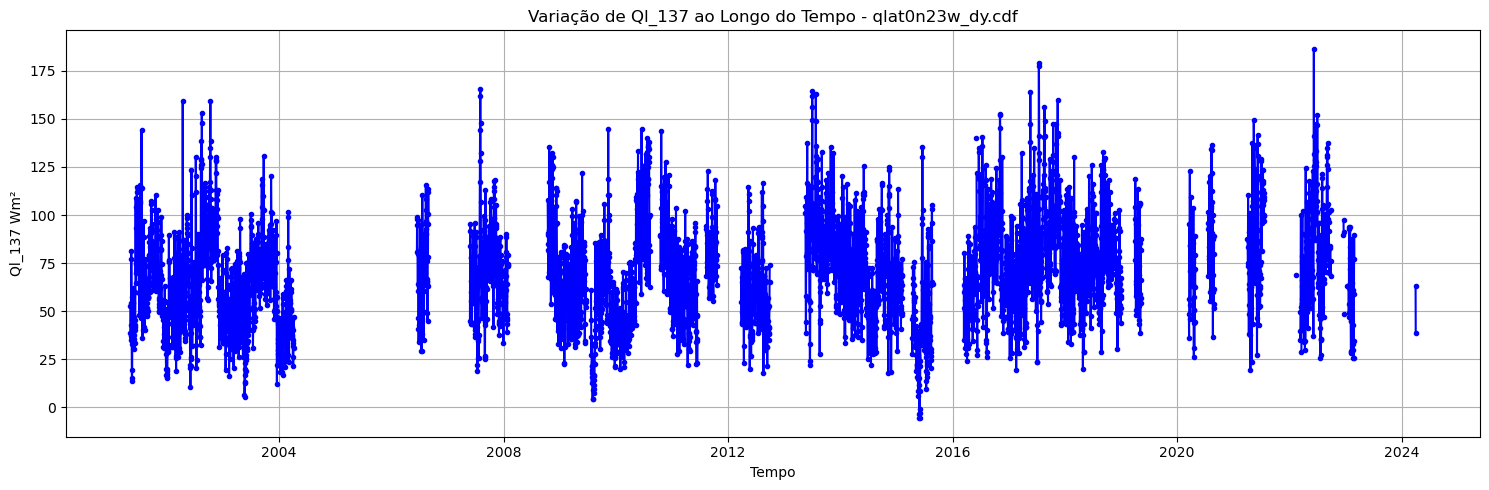

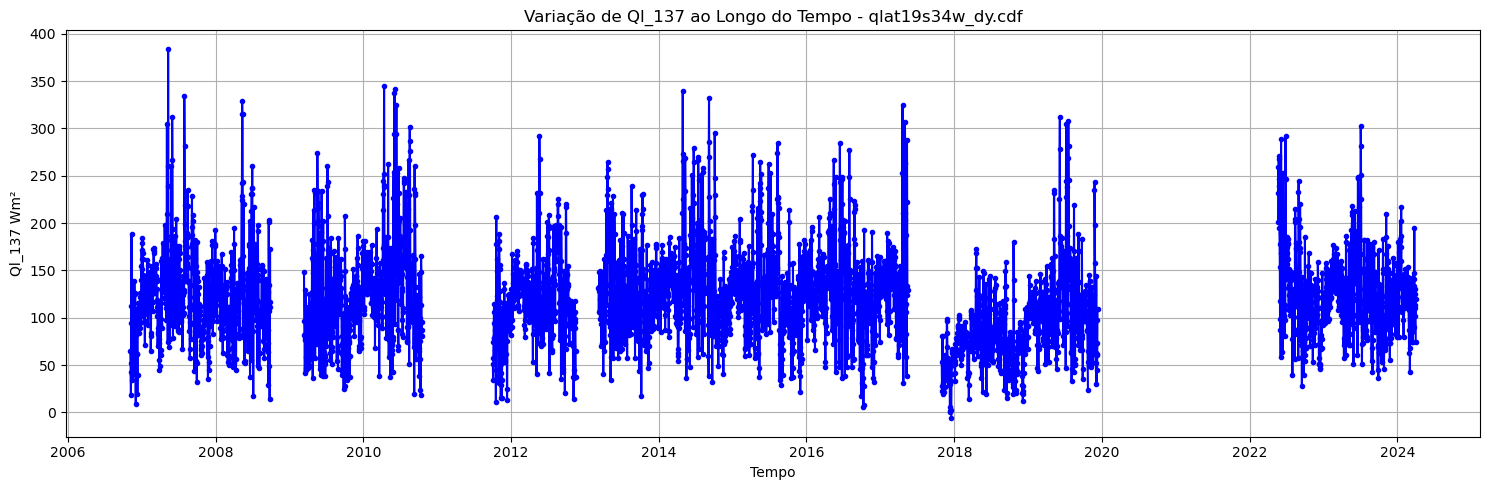

In [3]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Função para ler tempo e variável de interesse de um arquivo NetCDF
def ler_dados(arquivo, var_nome):
    ds = nc.Dataset(arquivo)
    tempo = ds.variables['time'][:]
    variavel = ds.variables[var_nome][:]
    # Extrair a data de origem dos units da variável tempo
    units = ds.variables['time'].units
    ds.close()
    # Remover dimensões singulares
    variavel = np.squeeze(variavel)
    # Extrair a data de origem dos units
    origin_date = pd.to_datetime(units.split('since ')[1])
    return tempo, variavel, origin_date

# Caminho para os arquivos
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/Dados_fluxos_PMEL/qlat*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Nome da variável de interesse
var_nome = 'QL_137'  # Substitua pelo nome real da sua variável

# Processar e plotar dados de cada arquivo individualmente
for arquivo in arquivos_netCDF:
    tempo, variavel, origin_date = ler_dados(arquivo, var_nome)
    
    # Converter tempo para objetos datetime
    tempo = pd.to_datetime(tempo, unit='D', origin=origin_date)

    # Criar uma nova figura para cada arquivo
    plt.figure(figsize=(15, 5))
    plt.plot(tempo, variavel, marker='.', linestyle='-', color='blue')
    plt.title(f'Variação de {var_nome.capitalize()} ao Longo do Tempo - {arquivo.split("/")[-1]}')
    plt.xlabel('Tempo')
    plt.ylabel(f'{var_nome.capitalize()} Wm²')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [34]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Função para ler tempo e variável de interesse de um arquivo NetCDF
def ler_dados(arquivo, var_nome):
    ds = nc.Dataset(arquivo)
    tempo = ds.variables['time'][:]
    variavel = ds.variables[var_nome][:]
    units = ds.variables['time'].units
    ds.close()
    variavel = np.squeeze(variavel)
    origin_date = pd.to_datetime(units.split('since ')[1])
    return tempo, variavel, origin_date

# Caminho para os arquivos
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/Dados_fluxos_PMEL/qlat*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Nome da variável de interesse
var_nome = 'QL_137'  # Substitua pelo nome real da sua variável

# Processar e plotar dados de cada arquivo individualmente
for arquivo in arquivos_netCDF:
    tempo, variavel, origin_date = ler_dados(arquivo, var_nome)
    
    # Converter tempo para objetos datetime
    tempo = pd.to_datetime(tempo, unit='D', origin=origin_date)
    
    # Criar um DataFrame
    df = pd.DataFrame({var_nome: variavel}, index=tempo)
    
    # Calcular média a cada 5 dias
    df_resampled = df.resample('5D').mean()

    # Criar uma nova figura para cada arquivo
    plt.figure(figsize=(15, 5))
    plt.plot(df_resampled.index, df_resampled[var_nome], marker='.', linestyle='-', color='blue')
    plt.title(f'Média de 5 Dias de {var_nome.capitalize()} - {arquivo.split("/")[-1]}')
    plt.xlabel('Tempo')
    plt.ylabel(f'{var_nome.capitalize()} (Wm²)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


ImportError: cannot import name 'warn_alias_replacement' from 'pandas.core.apply' (/home/leticia/anaconda3/lib/python3.11/site-packages/pandas/core/apply.py)

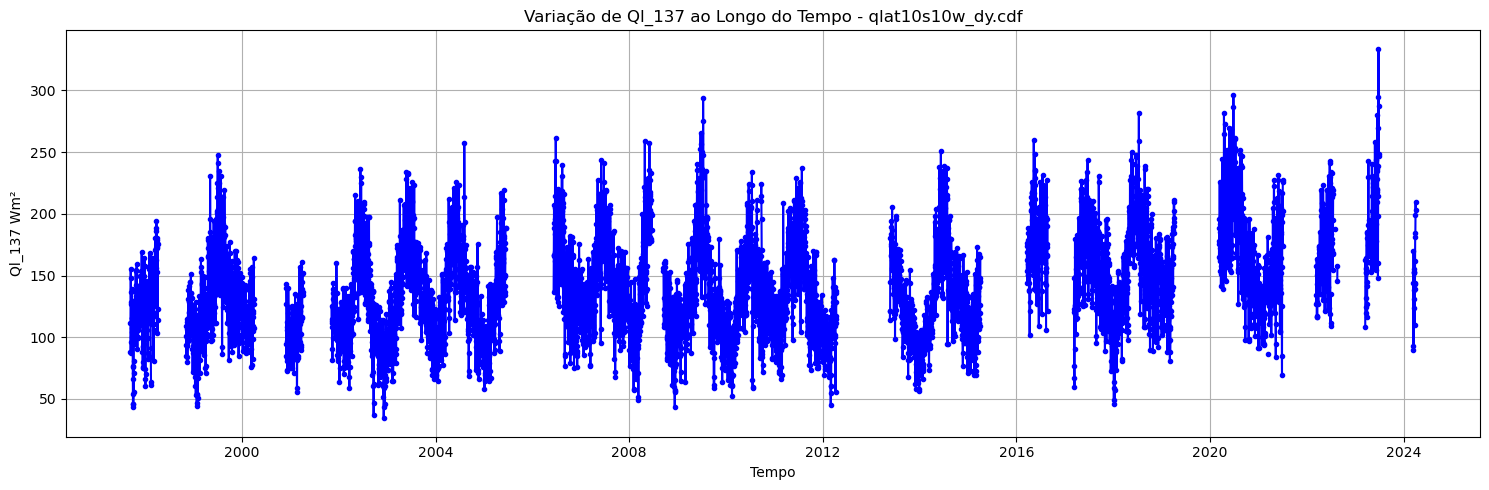

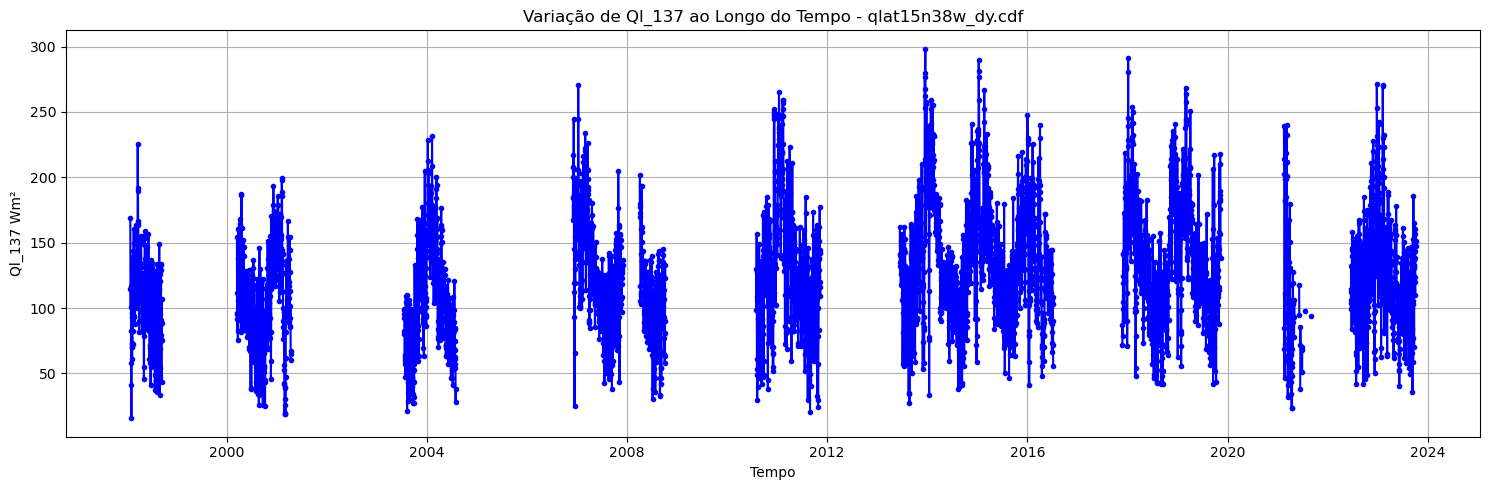

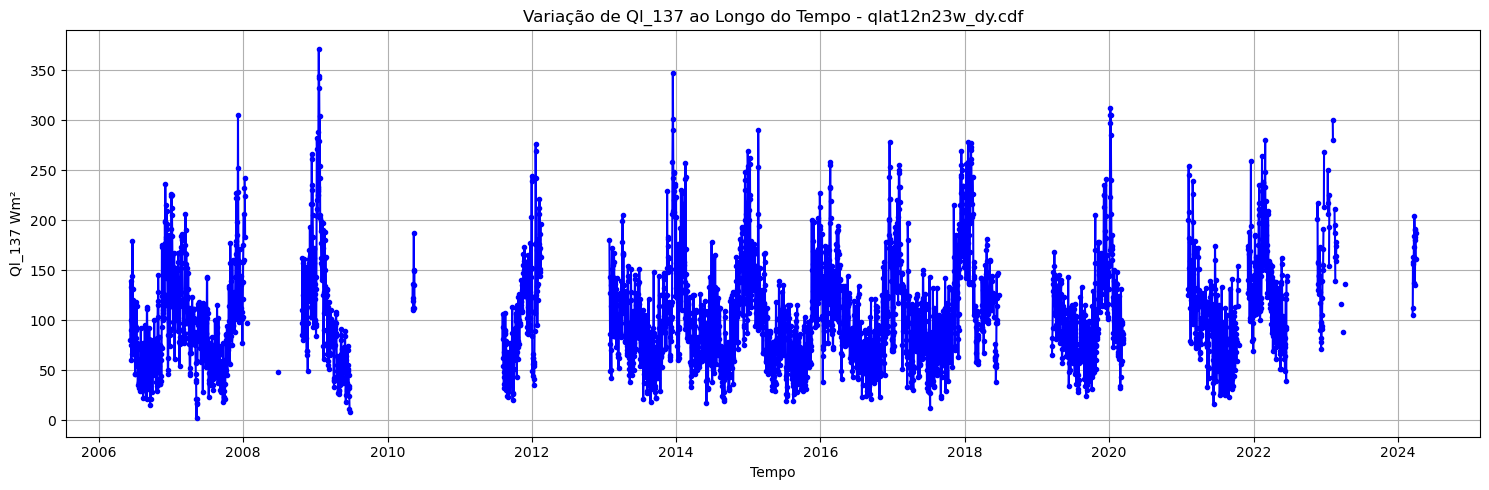

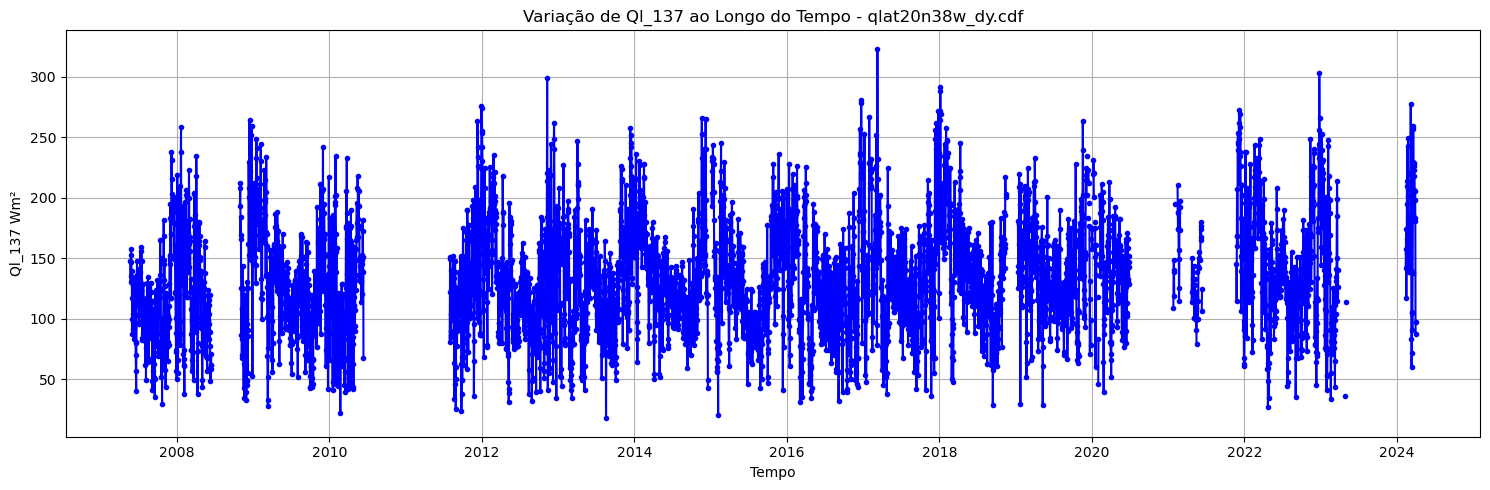

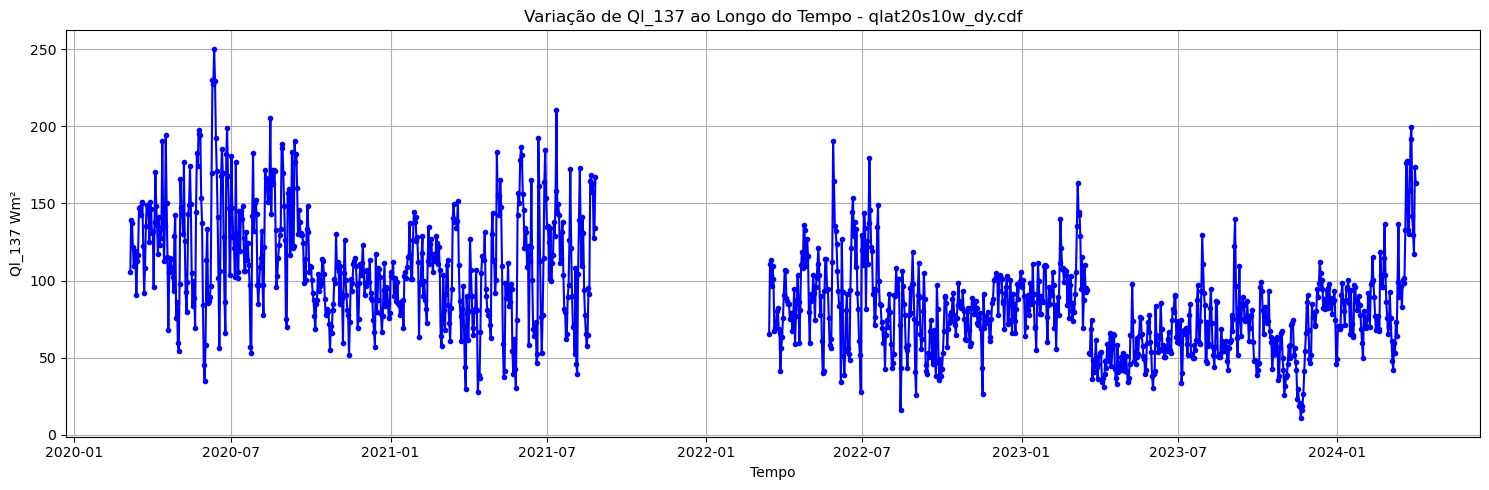

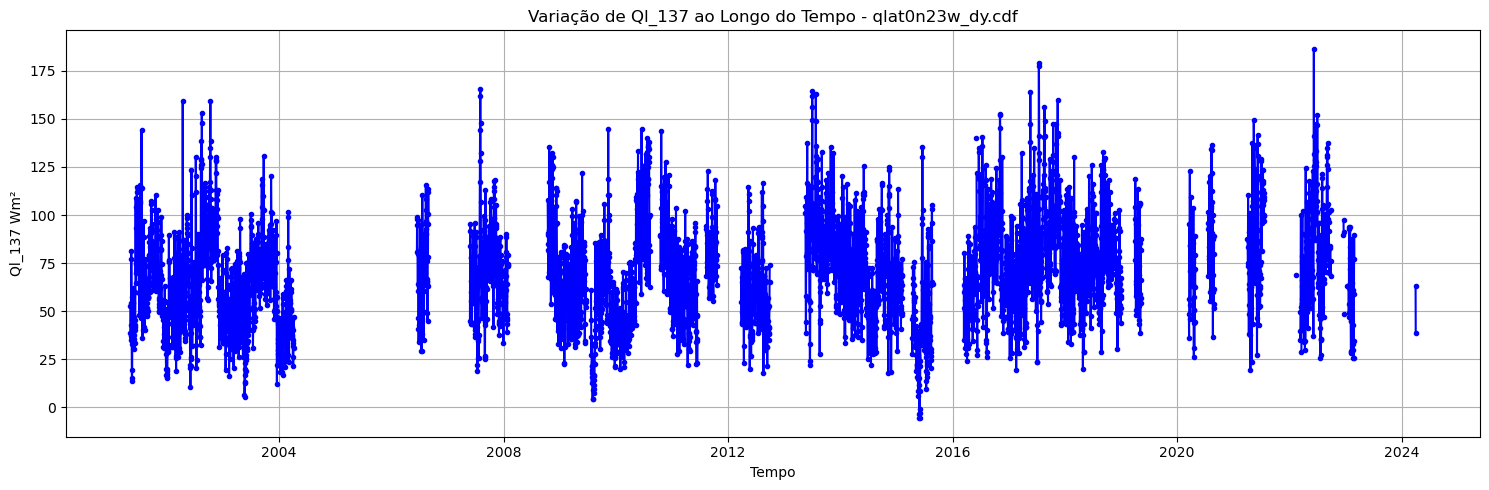

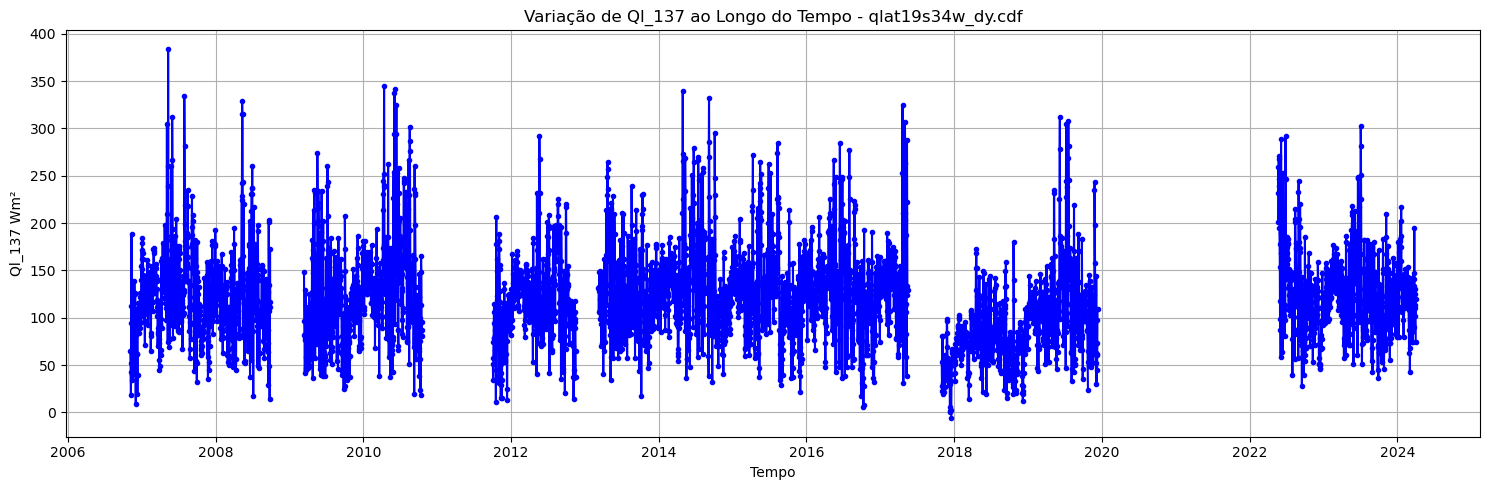

Arquivo: qlat10s10w_dy.cdf - Média: 139.87 Wm², Desvio Padrão: 39.61 Wm²
Arquivo: qlat15n38w_dy.cdf - Média: 124.93 Wm², Desvio Padrão: 44.69 Wm²
Arquivo: qlat12n23w_dy.cdf - Média: 105.11 Wm², Desvio Padrão: 51.01 Wm²
Arquivo: qlat20n38w_dy.cdf - Média: 132.87 Wm², Desvio Padrão: 45.81 Wm²
Arquivo: qlat20s10w_dy.cdf - Média: 92.69 Wm², Desvio Padrão: 36.27 Wm²
Arquivo: qlat0n23w_dy.cdf - Média: 70.20 Wm², Desvio Padrão: 26.13 Wm²
Arquivo: qlat19s34w_dy.cdf - Média: 121.07 Wm², Desvio Padrão: 47.94 Wm²


In [21]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Função para ler tempo e variável de interesse de um arquivo NetCDF
def ler_dados(arquivo, var_nome):
    ds = nc.Dataset(arquivo)
    tempo = ds.variables['time'][:]
    variavel = ds.variables[var_nome][:]
    units = ds.variables['time'].units
    ds.close()
    variavel = np.squeeze(variavel)
    origin_date = pd.to_datetime(units.split('since ')[1])
    return tempo, variavel, origin_date

# Caminho para os arquivos
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/Dados_fluxos_PMEL/qlat*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Nome da variável de interesse
var_nome = 'QL_137'  # Substitua pelo nome real da sua variável

# Processar dados de cada arquivo e calcular estatísticas
estatisticas = []
for arquivo in arquivos_netCDF:
    tempo, variavel, origin_date = ler_dados(arquivo, var_nome)
    tempo = pd.to_datetime(tempo, unit='D', origin=origin_date)
    
    media = np.mean(variavel)
    desvio_padrao = np.std(variavel)
    
    estatisticas.append((arquivo.split("/")[-1], media, desvio_padrao))
    
    plt.figure(figsize=(15, 5))
    plt.plot(tempo, variavel, marker='.', linestyle='-', color='blue')
    plt.title(f'Variação de {var_nome.capitalize()} ao Longo do Tempo - {arquivo.split("/")[-1]}')
    plt.xlabel('Tempo')
    plt.ylabel(f'{var_nome.capitalize()} Wm²')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exibir as estatísticas calculadas
for estat in estatisticas:
    print(f'Arquivo: {estat[0]} - Média: {estat[1]:.2f} Wm², Desvio Padrão: {estat[2]:.2f} Wm²')


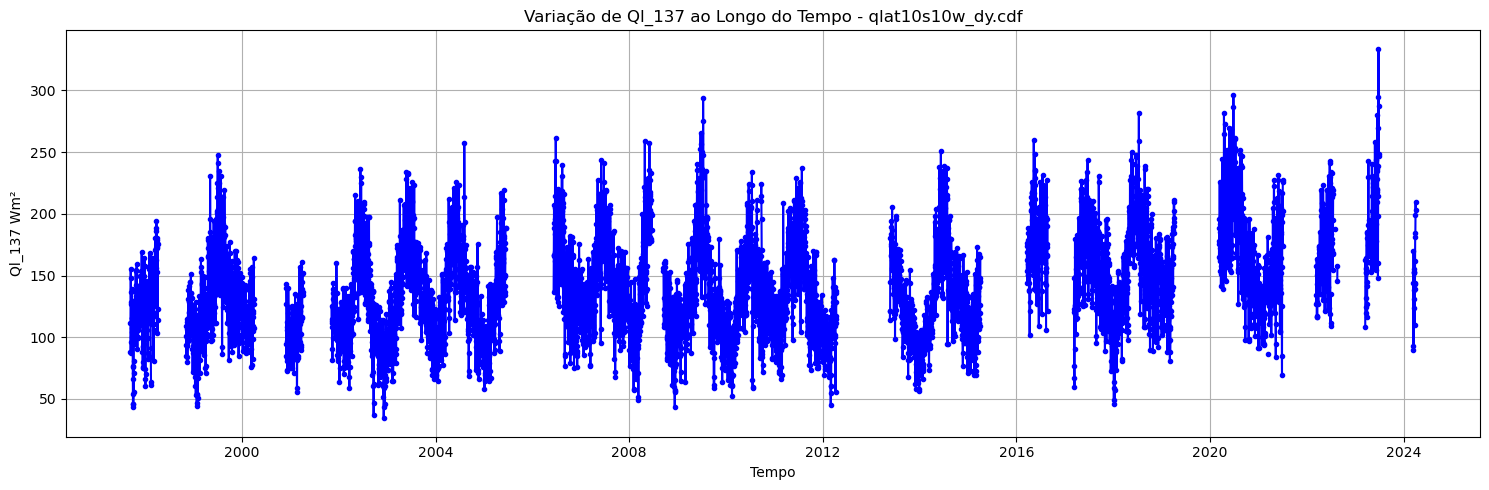

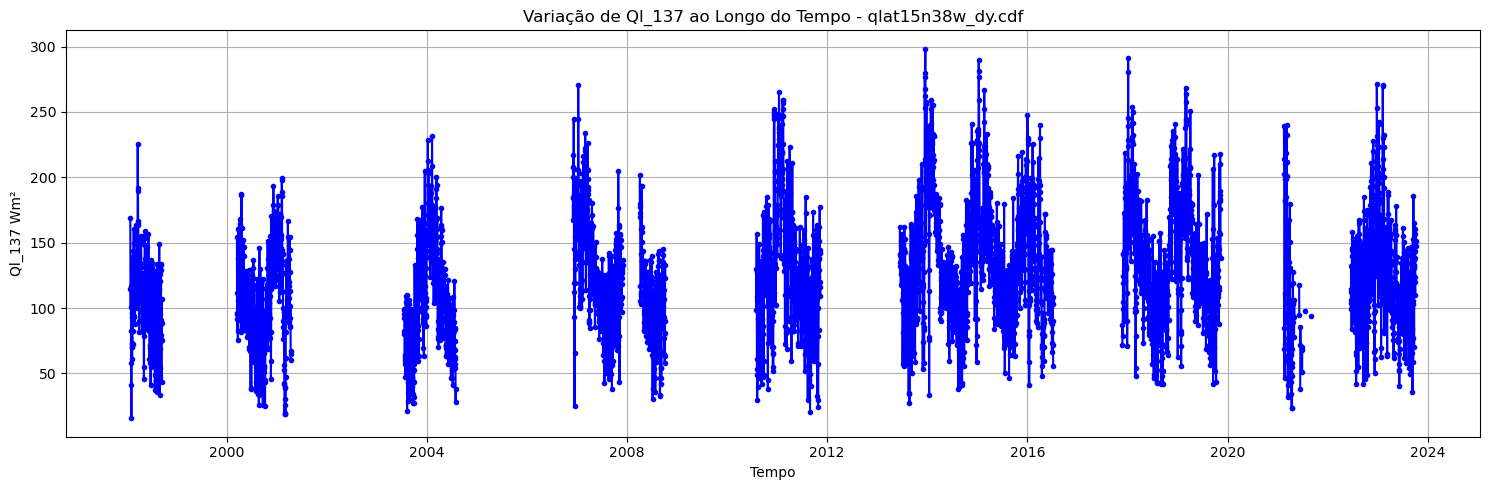

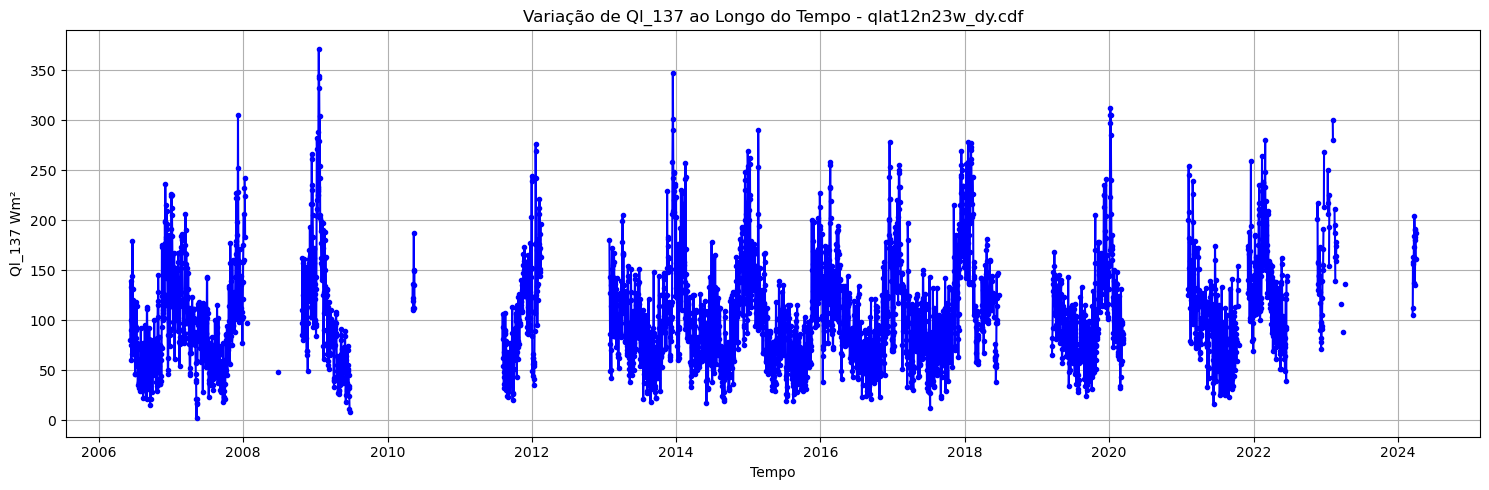

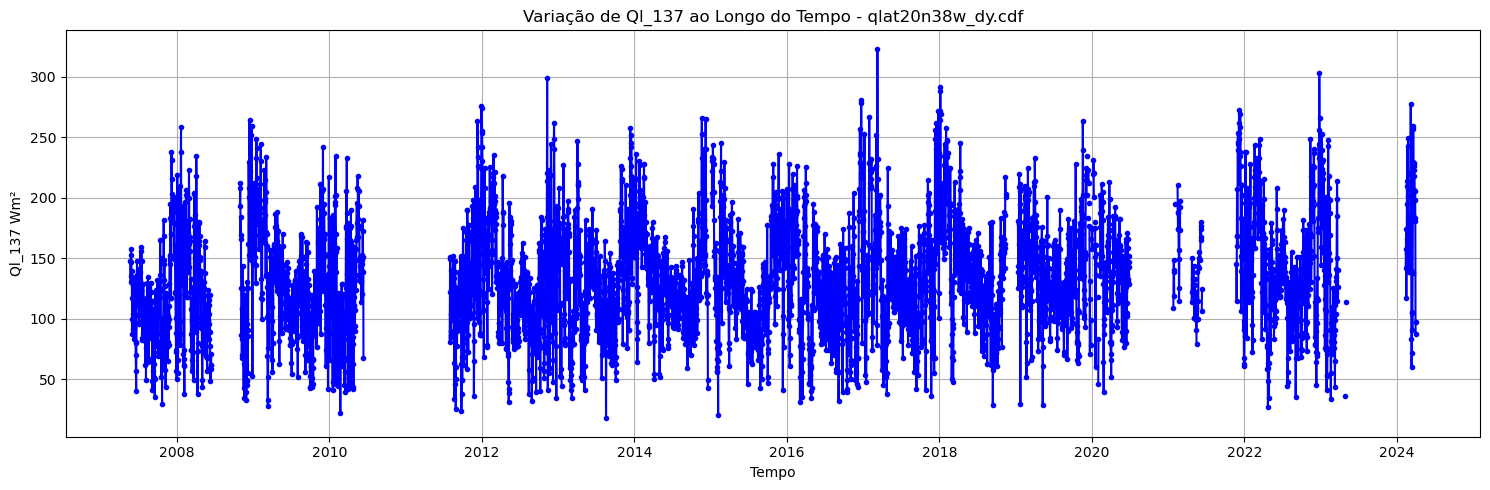

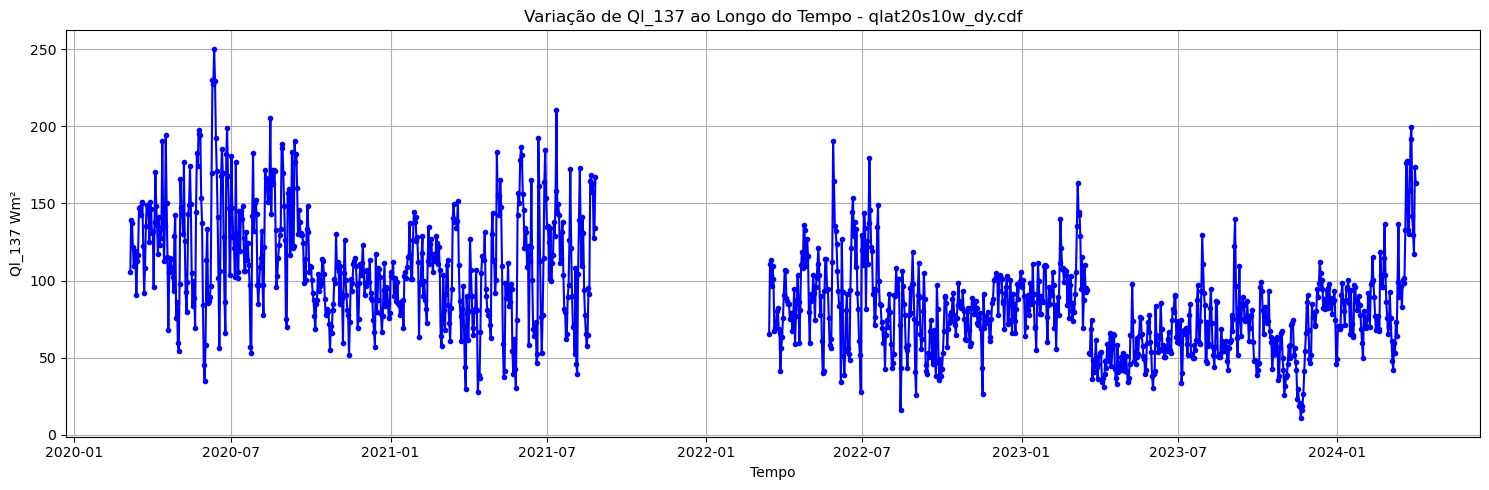

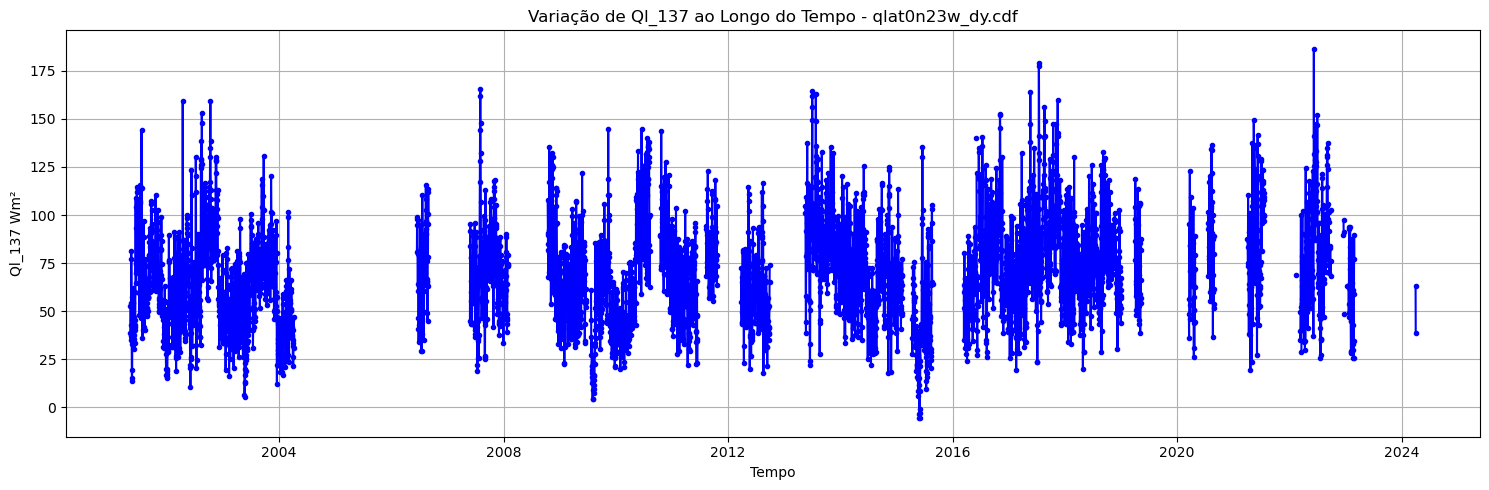

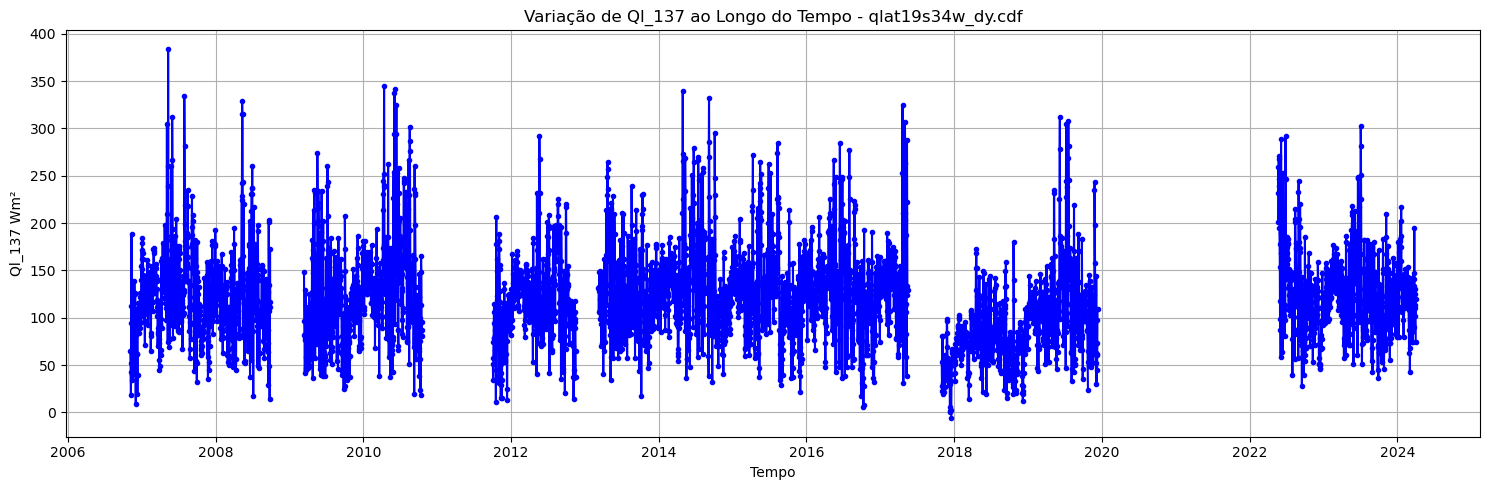

Arquivo: qlat10s10w_dy.cdf - Média: 139.87 Wm², Desvio Padrão: 39.61 Wm²
Arquivo: qlat15n38w_dy.cdf - Média: 124.93 Wm², Desvio Padrão: 44.69 Wm²
Arquivo: qlat12n23w_dy.cdf - Média: 105.11 Wm², Desvio Padrão: 51.01 Wm²
Arquivo: qlat20n38w_dy.cdf - Média: 132.87 Wm², Desvio Padrão: 45.81 Wm²
Arquivo: qlat20s10w_dy.cdf - Média: 92.69 Wm², Desvio Padrão: 36.27 Wm²
Arquivo: qlat0n23w_dy.cdf - Média: 70.20 Wm², Desvio Padrão: 26.13 Wm²
Arquivo: qlat19s34w_dy.cdf - Média: 121.07 Wm², Desvio Padrão: 47.94 Wm²
Média das Médias: 112.39 Wm²
Média dos Desvios Padrão: 41.64 Wm²


In [27]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Função para ler tempo e variável de interesse de um arquivo NetCDF
def ler_dados(arquivo, var_nome):
    ds = nc.Dataset(arquivo)
    tempo = ds.variables['time'][:]
    variavel = ds.variables[var_nome][:]
    units = ds.variables['time'].units
    ds.close()
    variavel = np.squeeze(variavel)
    origin_date = pd.to_datetime(units.split('since ')[1])
    return tempo, variavel, origin_date

# Caminho para os arquivos
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/Dados_fluxos_PMEL/qlat*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Nome da variável de interesse
var_nome = 'QL_137'  # Substitua pelo nome real da sua variável

# Processar dados de cada arquivo e calcular estatísticas
estatisticas = []
for arquivo in arquivos_netCDF:
    tempo, variavel, origin_date = ler_dados(arquivo, var_nome)
    tempo = pd.to_datetime(tempo, unit='D', origin=origin_date)
    
    media = np.mean(variavel)
    desvio_padrao = np.std(variavel)
    
    estatisticas.append((arquivo.split("/")[-1], media, desvio_padrao))
    
    plt.figure(figsize=(15, 5))
    plt.plot(tempo, variavel, marker='.', linestyle='-', color='blue')
    plt.title(f'Variação de {var_nome.capitalize()} ao Longo do Tempo - {arquivo.split("/")[-1]}')
    plt.xlabel('Tempo')
    plt.ylabel(f'{var_nome.capitalize()} Wm²')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exibir as estatísticas calculadas
for estat in estatisticas:
    print(f'Arquivo: {estat[0]} - Média: {estat[1]:.2f} Wm², Desvio Padrão: {estat[2]:.2f} Wm²')

# Calcular a média das médias e a média dos desvios padrões
medias = [estat[1] for estat in estatisticas]
desvios_padrao = [estat[2] for estat in estatisticas]

media_das_medias = np.mean(medias)
media_dos_desvios_padrao = np.mean(desvios_padrao)

print(f'Média das Médias: {media_das_medias:.2f} Wm²')
print(f'Média dos Desvios Padrão: {media_dos_desvios_padrao:.2f} Wm²')
